In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

**OptiML** is a sklearn compatible custom reimplementation of *Support Vector Machines* and *Deep Neural Networks*, both with some of the most successful features according to the state of art.

This work was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formulation of these models through a wide range of optimization algorithms object of study and developed for the Computational Mathematics course.

The scope of this report excludes the implementation details but is just to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.75** was achieved using a **Support Vector Regression** with **Laplacian kernel**.

The choice to train a SVR rather than any other models was dictated by my personal fascination about the versatility of the SVM formulation in such a differents ways. From the most immediate and simplest i.e, as a *primal formulation* which gives rise to an unconstrained optimization problem, going from more complex and powerful formulation i.e, as a constrained quadratic optimization problem deriving from the *Wolfe dual* of the primal problem; up to formulations as mathematical artifacts e.g., as an unconstrained quadratic optimization problem deriving from the *Lagrangian bi-dual relaxation* of the constraints in the Wolfe dual.

For performance and efficiency reasons, the training phase over ML-CUP19 in the grid search was done with a custom reimplementation of the Platt's *Sequential Minimization Optimization* algorithm which is the best-known way to train a SVM in its Wolfe dual formulation, since it breaks up the original large QP problem into a series of smallest possible problems, which are then solved analytically.

## Monk's Problem

### Support Vector Classifier

In [2]:
import numpy as np

from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

#### Monk #1

In [3]:
X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]
    
svc = DualSVC(kernel=PolyKernel(degree=3, gamma='scale'), verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost
   0	-1.3103e+01
   5	-1.5372e+01
  10	-1.5373e+01
  15	-1.5650e+01
  20	-1.5653e+01
  25	-1.5653e+01

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [4]:
X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

svc = DualSVC(kernel=PolyKernel(degree=2, gamma='scale'), C=1000, verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost
   0	-1.2859e+02
   5	-3.4749e+02
  10	-3.6481e+02
  15	-3.6638e+02
  20	-3.6654e+02
  25	-3.6655e+02
  30	-3.6655e+02
  35	-3.6655e+02

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #3

In [5]:
X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

svc = DualSVC(kernel=PolyKernel(degree=4, gamma='auto'), C=100, verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost
   0	-2.4690e+03
   5	-2.5680e+03
  10	-2.6527e+03
  15	-2.6544e+03

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       204
         1.0       0.99      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### Neural Network Classifier

In [6]:
import numpy as np

from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.neural_network.layers import FullyConnected

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

#### Monk #1

In [8]:
from optiml.ml.neural_network.activations import sigmoid
from optiml.ml.neural_network.losses import mean_squared_error

from optiml.opti.unconstrained.line_search import SteepestGradientDescent

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 1, sigmoid)),
                              loss=mean_squared_error, optimizer=SteepestGradientDescent, 
                              max_iter=400, max_f_eval=15000, verbose=10)
net.fit(X_train, y_train)
print(classification_report(y_test, net.predict(X_test)))

iter	feval	 cost		 gnorm		ls	it	 astar
   0	   1	 1.5845e-01	 7.8432e-02	 7	 0	 1.8817e+00
  10	  19	 1.2815e-01	 1.9693e-02	 1	 0	 1.0000e+00
  20	 143	 1.1415e-01	 1.4827e-02	 8	 0	 2.0908e+00
  30	 373	 8.1338e-02	 1.0951e-02	18	 0	 5.9962e+00
  40	 615	 7.0588e-02	 6.6323e-03	34	 0	 3.2359e+01
  50	 851	 6.5322e-02	 4.5712e-03	27	 0	 1.5477e+01
  60	1120	 6.2058e-02	 3.0154e-03	22	 0	 9.1392e+00
  70	1374	 6.0171e-02	 2.4726e-03	14	 0	 3.9341e+00
  80	1569	 5.8314e-02	 3.2662e-03	 4	 0	 1.3717e+00
  90	1719	 5.7809e-02	 2.3636e-03	26	 0	 1.3930e+01
 100	1890	 4.8478e-02	 1.1735e-02	 1	 0	 1.0000e+00
 110	2002	 4.6367e-02	 6.0037e-03	20	 0	 7.4027e+00
 120	2196	 3.3080e-02	 5.9692e-03	21	 0	 8.2253e+00
 130	2458	 2.6320e-02	 4.5050e-03	23	 0	 1.0155e+01
 140	2725	 2.2706e-02	 4.1295e-03	12	 0	 3.1866e+00
 150	2975	 1.9985e-02	 4.2641e-03	10	 0	 2.5812e+00
 160	3117	 1.5381e-02	 4.1277e-03	18	 0	 5.9962e+00
 170	3334	 1.2538e-02	 3.8255e-03	37	 0	 4.4388e+01
 180	3609	 8.4957e-03	 3.

#### Monk #2

In [11]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import sparse_categorical_cross_entropy

from optiml.opti.unconstrained.line_search import SteepestGradientDescent

X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, 
                              optimizer=SteepestGradientDescent, 
                              max_iter=500, max_f_eval=15000, verbose=10)
net.fit(X_train, y_train)
print(classification_report(y_test, net.predict(X_test)))

iter	feval	 cost		 gnorm		ls	it	 astar
   0	   1	 3.3751e-01	 5.9291e-02	 1	 0	 1.0000e+00
  10	  64	 3.2799e-01	 2.3698e-02	21	 0	 8.2253e+00
  20	 164	 3.1940e-01	 1.8081e-02	18	 0	 5.9962e+00
  30	 262	 3.1478e-01	 1.4314e-02	21	 0	 8.2253e+00
  40	 390	 2.9666e-01	 3.0243e-02	21	 0	 8.2253e+00
  50	 546	 1.8970e-01	 4.4960e-02	 7	 0	 1.8817e+00
  60	 673	 8.9547e-02	 5.1871e-02	13	 0	 3.5407e+00
  70	 790	 4.9387e-02	 3.5782e-02	 1	 0	 1.0000e+00
  80	 910	 2.9893e-02	 2.2261e-02	22	 0	 9.1392e+00
  90	1082	 1.7595e-02	 1.4378e-02	15	 0	 4.3712e+00
 100	1288	 1.0942e-02	 9.0844e-03	34	 0	 3.2359e+01
 110	1573	 5.7094e-03	 4.9505e-03	39	 0	 5.4801e+01
 120	1917	 2.9816e-03	 2.7619e-03	29	 0	 1.9108e+01
 130	2287	 1.8559e-03	 1.7461e-03	34	 0	 3.2359e+01
 140	2706	 1.0834e-03	 1.0012e-03	53	 0	 2.3955e+02
 150	3196	 5.8538e-04	 5.6919e-04	45	 0	 1.0312e+02
 160	3726	 3.3849e-04	 3.3113e-04	51	 0	 1.9403e+02
 170	4308	 1.9526e-04	 1.9035e-04	61	 0	 5.5648e+02
 180	4935	 1.1840e-04	 1.

#### Monk #3

In [13]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import categorical_cross_entropy
from optiml.ml.neural_network.regularizers import L2

from optiml.opti.unconstrained.line_search import BFGS

from optiml.opti.unconstrained.stochastic import Adam

X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

net = NeuralNetworkClassifier((FullyConnected(17, 10, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1)),
                               FullyConnected(10, 1, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1))),
                              loss=mean_squared_error, optimizer=BFGS, max_iter=500, max_f_eval=15000, verbose=10)
net.fit(X_train, y_train)
print(classification_report(y_test, net.predict(X_test)))

iter	feval	 cost		 gnorm		ls	it	 astar		 rho
   0	   1	 1.2976e-01	 1.8780e-02	19	 0	 6.6625e+00	 4.1662e+03
  10	  29	 5.8991e-02	 3.6242e-02	 1	 0	 1.0000e+00	 2.3285e+02
  20	  39	 4.8977e-02	 3.2756e-03	 1	 0	 1.0000e+00	 1.9181e+03
  30	  49	 4.6754e-02	 3.4328e-03	 1	 0	 1.0000e+00	 7.7719e+03
  40	  59	 4.6193e-02	 1.2885e-03	 1	 0	 1.0000e+00	 5.5887e+05
  50	  69	 4.5994e-02	 8.4704e-04	 1	 0	 1.0000e+00	 2.2935e+05
  60	  79	 4.5906e-02	 6.8838e-04	 1	 0	 1.0000e+00	 8.9751e+04
  70	  89	 4.5865e-02	 2.2268e-04	 1	 0	 1.0000e+00	 1.3512e+06
  80	  99	 4.5857e-02	 2.6707e-04	 1	 0	 1.0000e+00	 1.4953e+07
  90	 109	 4.5843e-02	 2.0735e-04	 1	 0	 1.0000e+00	 1.0840e+07
 100	 119	 4.5835e-02	 2.2623e-04	 1	 0	 1.0000e+00	 1.8848e+06
 110	 129	 4.5806e-02	 2.9713e-04	 1	 0	 1.0000e+00	 6.6065e+05
 120	 139	 4.5786e-02	 2.7821e-04	 1	 0	 1.0000e+00	 2.9583e+05
 130	 149	 4.5763e-02	 3.3097e-04	 1	 0	 1.0000e+00	 1.8911e+05
 140	 159	 4.5745e-02	 2.2920e-04	 1	 0	 1.0000e+00	 5.9499

## ML-CUP19

In [14]:
import numpy as np

def load_ml_cup():
    ml_cup = np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TR.csv', delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_ml_cup_blind():
    return np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TS.csv', delimiter=','), obj=0, axis=1)

In [15]:
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=y_true.ndim - 1))  # for multi-output compatibility

In [3]:
from optiml.ml.utils import plot_validation_curve, plot_learning_curve
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import gaussian, laplacian

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

gamma_range = [1e-8, 1e-6, 1e-4, 1e-2]
C_range = [1, 10, 100, 1000]
epsilon_range = [0.001, 0.01, 0.1, 0.2, 0.3]

tuned_parameters = {'estimator__kernel': [gaussian, laplacian],
                    'estimator__epsilon': epsilon_range,
                    'estimator__C': C_range,
                    'estimator__kernel__gamma': gamma_range}

grid = GridSearchCV(MultiOutputRegressor(DualSVR()),
                    param_grid=tuned_parameters,
                    scoring=make_scorer(mean_euclidean_error, greater_is_better=False),
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    verbose=True)
grid.fit(X, y)
print(f'best parameters: {grid.best_params_}')
print(f'best score: {-grid.best_score_}')

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.0min finished


best parameters: {'estimator__C': 100, 'estimator__epsilon': 0.001, 'estimator__gamma': 1e-08, 'estimator__kernel': <function laplacian_kernel at 0x7f8b7fa5d3a0>}
best score: 0.7489511761793546


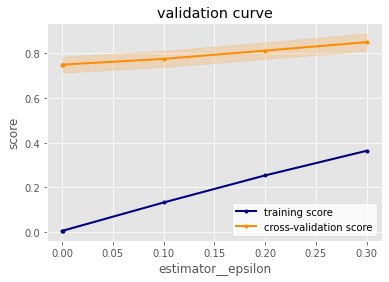

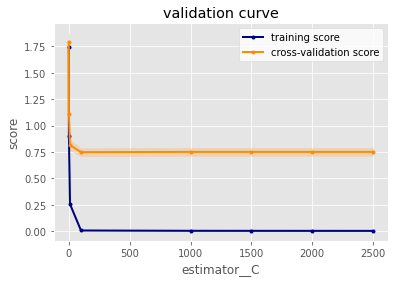

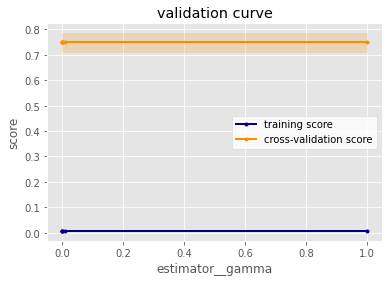

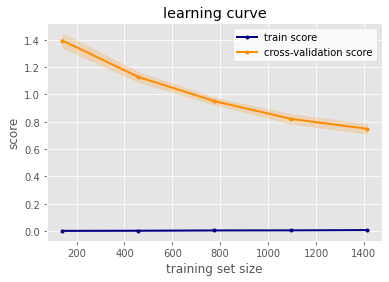

In [2]:
scorer = make_scorer(mean_euclidean_error)

# plot validation curve to visualize the performance metric over a
# range of values for some hyperparameters (C, gamma, epsilon, etc.)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__kernel__gamma', gamma_range, scorer)

# plot learning curve to visualize the effect of the
# number of observations on the performance metric
plot_learning_curve(grid.best_estimator_, X, y, scorer)

In [ ]:
# save predictions on the blind test set
np.savetxt(module_path + '/optiml/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', grid.predict(load_ml_cup_blind()), delimiter=',')